In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# 1. LOAD DATA & OVERVIEW

In [3]:
application_train = pd.read_csv('../data/raw/application_train.csv')
application_test = pd.read_csv('../data/raw/application_test.csv')

In [4]:
print(f'Shape of dataset: {application_train.shape}')
print(f'Duplicated row: {application_train.duplicated().sum()}')

Shape of dataset: (307511, 122)
Duplicated row: 0


In [5]:
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 1.1 N/A value analysis

In [7]:
#Check missing values
na_val=application_train.isnull().sum()
na_val_pct = 100*application_train.isnull().sum()/len(application_train)

na_val_table=pd.concat([na_val, na_val_pct],axis=1)
na_val_table = na_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})

na_val_table = na_val_table[na_val_table.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(2)

na_val_table.reset_index()

,index,Missing Values,% of Total Values
0,COMMONAREA_MEDI,214865,69.87
1,COMMONAREA_MODE,214865,69.87
2,COMMONAREA_AVG,214865,69.87
3,NONLIVINGAPARTMENTS_MODE,213514,69.43
4,NONLIVINGAPARTMENTS_MEDI,213514,69.43
5,NONLIVINGAPARTMENTS_AVG,213514,69.43
6,FONDKAPREMONT_MODE,210295,68.39
7,LIVINGAPARTMENTS_AVG,210199,68.35
8,LIVINGAPARTMENTS_MEDI,210199,68.35
9,LIVINGAPARTMENTS_MODE,210199,68.35


A large number of features in the dataset contain substantial missing information. In total, 49 columns have missing rates above 47%, with 40 of them surpassing the 50% threshold, and 17 exceeding 65%. 

**Due to the extensive missingness, the housing- and apartment-related variables will be removed, while the key EXT_SOURCE features will be preserved for modeling.**

## 1.2 Imbalance

In [8]:
columns = [col for col in application_train.columns if '_ID_' not in col]

imbalance_ratios = {}

for col in columns:
    # Count how many times each value appears
    value_counts = application_train[col].value_counts()
    
    # Check if the column should be evaluated:
    # - object type (categorical)
    # - OR numeric but with fewer than 50 unique values
    if application_train[col].dtype == 'object' or len(value_counts) < 50:
        
        imbalance_ratio = value_counts.max() / value_counts.min()
        imbalance_ratios[col] = imbalance_ratio
    
    else:
        # Set None for columns not evaluated
        imbalance_ratios[col] = None

valid_ratios = {k: v for k, v in imbalance_ratios.items() if v is not None}

# Convert to DataFrame for easy sorting
imbalance_table = pd.DataFrame.from_dict(valid_ratios, orient='index', columns=['Imbalance_Ratio'])

imbalance_table = imbalance_table.sort_values(by='Imbalance_Ratio', ascending=False)

imbalance_table

,Imbalance_Ratio
FLAG_MOBIL,307510.000000
DEF_60_CNT_SOCIAL_CIRCLE,280721.000000
DEF_30_CNT_SOCIAL_CIRCLE,271324.000000
AMT_REQ_CREDIT_BUREAU_DAY,264503.000000
AMT_REQ_CREDIT_BUREAU_HOUR,264366.000000
AMT_REQ_CREDIT_BUREAU_MON,222233.000000
AMT_REQ_CREDIT_BUREAU_QRT,215417.000000
CNT_CHILDREN,215371.000000
OBS_60_CNT_SOCIAL_CIRCLE,164666.000000
OBS_30_CNT_SOCIAL_CIRCLE,163910.000000


Many categorical and low-cardinality variables exhibit extremely high imbalance ratios, with several exceeding 100,000, meaning almost all observations fall into a single category. Variables such as social-circle counts, bureau request counts, and most document flags provide little discriminatory information and should be removed. Housing- and apartment-related features also show both high imbalance and heavy missingness, and are therefore dropped entirely.
In contrast, key demographic fields (e.g., gender, income type, family status, occupation) and essential predictors like the EXT_SOURCE variables should be retained, as they remain informative despite imbalance.

# 2.TARGET VARIABLE ANALYSIS

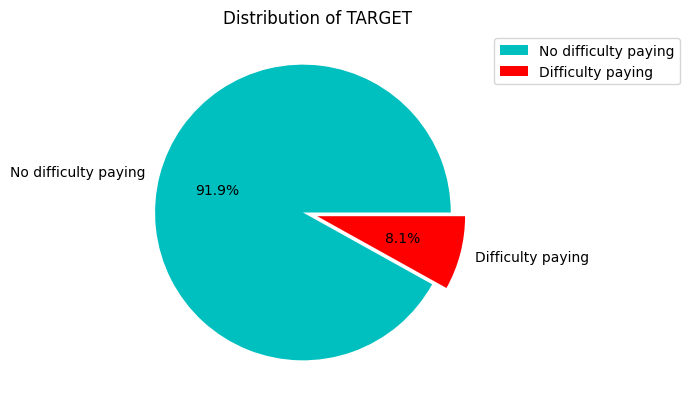

In [9]:
sizes = application_train["TARGET"].value_counts(normalize=True)
labels = ["No difficulty paying", "Difficulty paying"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", explode=[0.1,0], colors=['c','r'])
plt.title("Distribution of TARGET")
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

# 3. CATEGORIAL VARIABLE

In [10]:
cate_col = application_train.select_dtypes(['object']).columns
cate_df = application_train[cate_col]

unique_df = cate_df.nunique()
missing_pct = cate_df.isnull().sum()/cate_df.shape[0] * 100

pd.concat([unique_df, missing_pct], axis = 1).rename(columns={0: 'Unique val', 1: '% NA value'})

,Unique val,% NA value
NAME_CONTRACT_TYPE,2,0.000000
CODE_GENDER,3,0.000000
FLAG_OWN_CAR,2,0.000000
FLAG_OWN_REALTY,2,0.000000
NAME_TYPE_SUITE,7,0.420148
NAME_INCOME_TYPE,8,0.000000
NAME_EDUCATION_TYPE,5,0.000000
NAME_FAMILY_STATUS,6,0.000000
NAME_HOUSING_TYPE,6,0.000000
OCCUPATION_TYPE,18,31.345545


## 3.1 Plot function

In [11]:
cate_plot_df = application_train.copy()

In [21]:
def plot_categorical(df, col_name):
    cross_tab = pd.crosstab(df[col_name], df['TARGET'])
    cross_tab.plot(kind='bar', stacked=True,  figsize=(5, 3))
    
    plt.title(f'Distribution of {col_name} by TARGET')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()

def distribution_cate(df, col_name):
    dist_df = df.copy()
    cate_raw_num = dist_df.groupby(col_name)['TARGET'].value_counts().rename("Count")
    cate_pct = (dist_df.groupby(col_name)['TARGET'].value_counts(normalize = True) * 100).round(2).rename('Percent %')
    cate_final = pd.concat([cate_raw_num, cate_pct], axis = 1)
    print(f'Distribution for each category in: ')
    print(cate_final)


## 3.2 Age, Gender, Asset own, Education, Occupaction

--------------------Distribution analysis for NAME_CONTRACT_TYPE--------------------
Distribution for each category in: 
                            Count  Percent %
NAME_CONTRACT_TYPE TARGET                   
Cash loans         0       255011      91.65
                   1        23221       8.35
Revolving loans    0        27675      94.52
                   1         1604       5.48


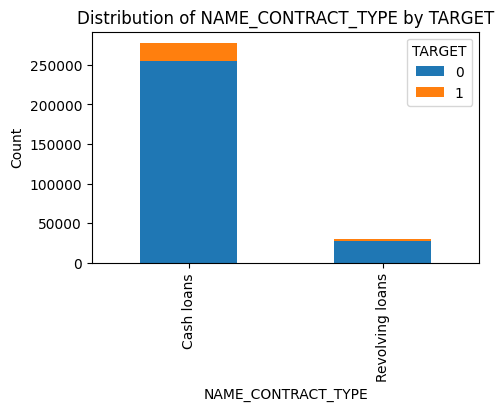

--------------------Distribution analysis for CODE_GENDER--------------------
Distribution for each category in: 
                     Count  Percent %
CODE_GENDER TARGET                   
F           0       188278      93.00
            1        14170       7.00
M           0        94404      89.86
            1        10655      10.14
XNA         0            4     100.00


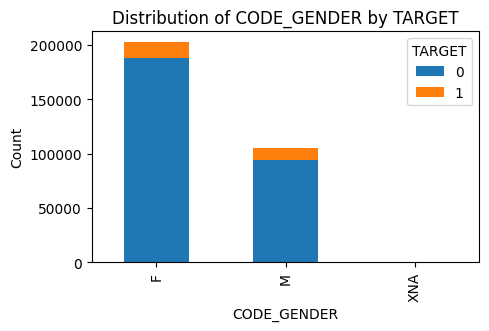

--------------------Distribution analysis for FLAG_OWN_CAR--------------------
Distribution for each category in: 
                      Count  Percent %
FLAG_OWN_CAR TARGET                   
N            0       185675      91.50
             1        17249       8.50
Y            0        97011      92.76
             1         7576       7.24


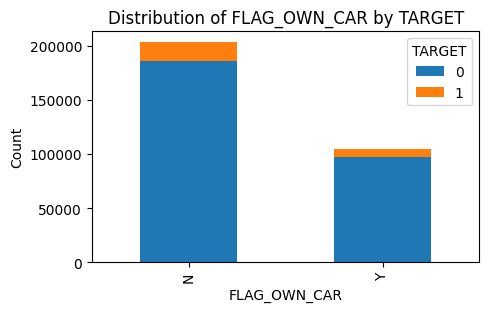

--------------------Distribution analysis for FLAG_OWN_REALTY--------------------
Distribution for each category in: 
                         Count  Percent %
FLAG_OWN_REALTY TARGET                   
N               0        86357      91.68
                1         7842       8.32
Y               0       196329      92.04
                1        16983       7.96


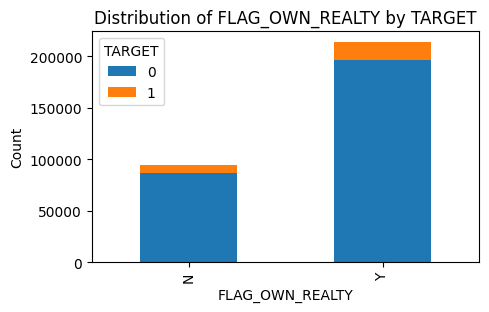

--------------------Distribution analysis for NAME_TYPE_SUITE--------------------
Distribution for each category in: 
                         Count  Percent %
NAME_TYPE_SUITE TARGET                   
Children        0         3026      92.62
                1          241       7.38
Family          0        37140      92.51
                1         3009       7.49
Group of people 0          248      91.51
                1           23       8.49
Other_A         0          790      91.22
                1           76       8.78
Other_B         0         1596      90.17
                1          174       9.83
Spouse, partner 0        10475      92.13
                1          895       7.87
Unaccompanied   0       228189      91.82
                1        20337       8.18


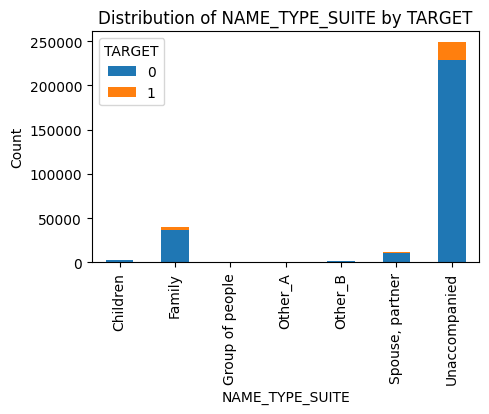

--------------------Distribution analysis for NAME_INCOME_TYPE--------------------
Distribution for each category in: 
                              Count  Percent %
NAME_INCOME_TYPE     TARGET                   
Businessman          0           10     100.00
Commercial associate 0        66257      92.52
                     1         5360       7.48
Maternity leave      0            3      60.00
                     1            2      40.00
Pensioner            0        52380      94.61
                     1         2982       5.39
State servant        0        20454      94.25
                     1         1249       5.75
Student              0           18     100.00
Unemployed           0           14      63.64
                     1            8      36.36
Working              0       143550      90.41
                     1        15224       9.59


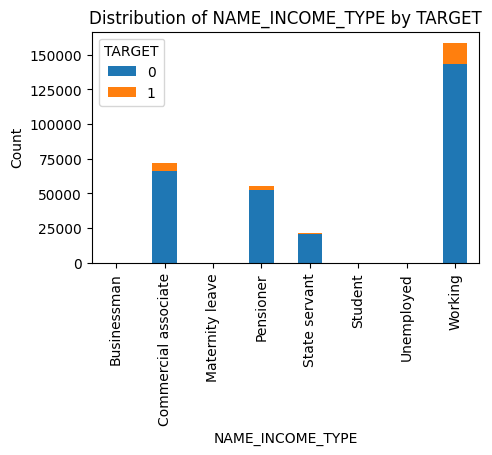

--------------------Distribution analysis for NAME_EDUCATION_TYPE--------------------
Distribution for each category in: 
                                       Count  Percent %
NAME_EDUCATION_TYPE           TARGET                   
Academic degree               0          161      98.17
                              1            3       1.83
Higher education              0        70854      94.64
                              1         4009       5.36
Incomplete higher             0         9405      91.52
                              1          872       8.48
Lower secondary               0         3399      89.07
                              1          417      10.93
Secondary / secondary special 0       198867      91.06
                              1        19524       8.94


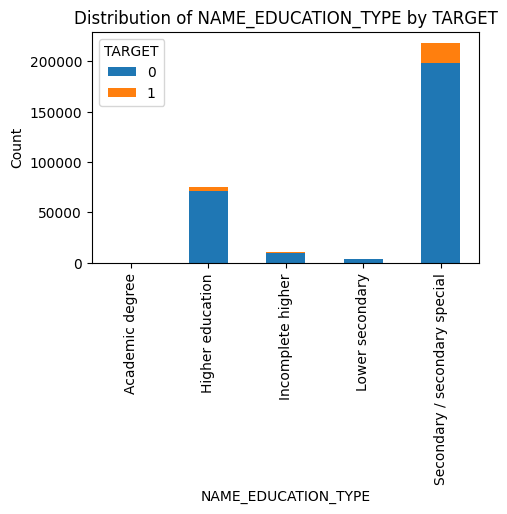

--------------------Distribution analysis for NAME_FAMILY_STATUS--------------------
Distribution for each category in: 
                              Count  Percent %
NAME_FAMILY_STATUS   TARGET                   
Civil marriage       0        26814      90.06
                     1         2961       9.94
Married              0       181582      92.44
                     1        14850       7.56
Separated            0        18150      91.81
                     1         1620       8.19
Single / not married 0        40987      90.19
                     1         4457       9.81
Unknown              0            2     100.00
Widow                0        15151      94.18
                     1          937       5.82


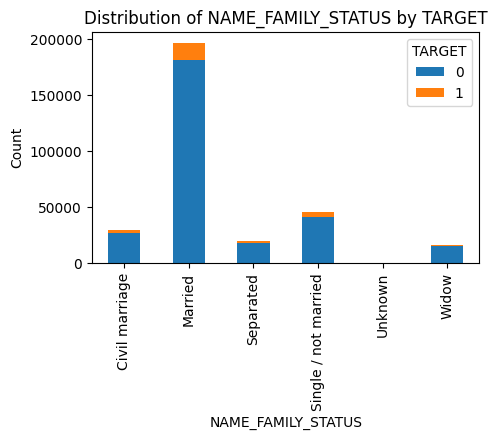

--------------------Distribution analysis for NAME_HOUSING_TYPE--------------------
Distribution for each category in: 
                             Count  Percent %
NAME_HOUSING_TYPE   TARGET                   
Co-op apartment     0         1033      92.07
                    1           89       7.93
House / apartment   0       251596      92.20
                    1        21272       7.80
Municipal apartment 0        10228      91.46
                    1          955       8.54
Office apartment    0         2445      93.43
                    1          172       6.57
Rented apartment    0         4280      87.69
                    1          601      12.31
With parents        0        13104      88.30
                    1         1736      11.70


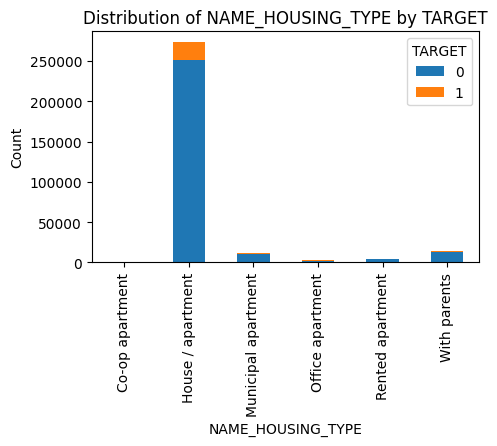

--------------------Distribution analysis for OCCUPATION_TYPE--------------------
Distribution for each category in: 
                              Count  Percent %
OCCUPATION_TYPE       TARGET                  
Accountants           0        9339      95.17
                      1         474       4.83
Cleaning staff        0        4206      90.39
                      1         447       9.61
Cooking staff         0        5325      89.56
                      1         621      10.44
Core staff            0       25832      93.70
                      1        1738       6.30
Drivers               0       16496      88.67
                      1        2107      11.33
HR staff              0         527      93.61
                      1          36       6.39
High skill tech staff 0       10679      93.84
                      1         701       6.16
IT staff              0         492      93.54
                      1          34       6.46
Laborers              0       49348 

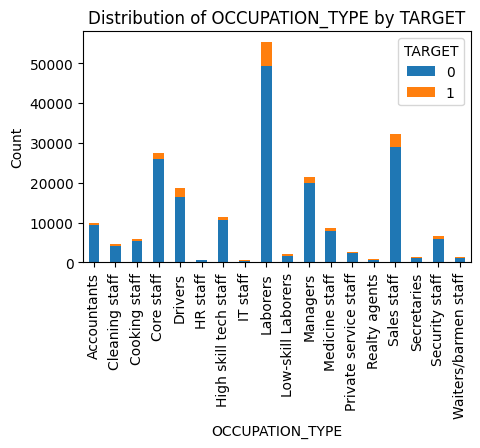

--------------------Distribution analysis for WEEKDAY_APPR_PROCESS_START--------------------
Distribution for each category in: 
                                   Count  Percent %
WEEKDAY_APPR_PROCESS_START TARGET                  
FRIDAY                     0       46237      91.85
                           1        4101       8.15
MONDAY                     0       46780      92.24
                           1        3934       7.76
SATURDAY                   0       31182      92.11
                           1        2670       7.89
SUNDAY                     0       14898      92.07
                           1        1283       7.93
THURSDAY                   0       46493      91.90
                           1        4098       8.10
TUESDAY                    0       49400      91.65
                           1        4501       8.35
WEDNESDAY                  0       47696      91.84
                           1        4238       8.16


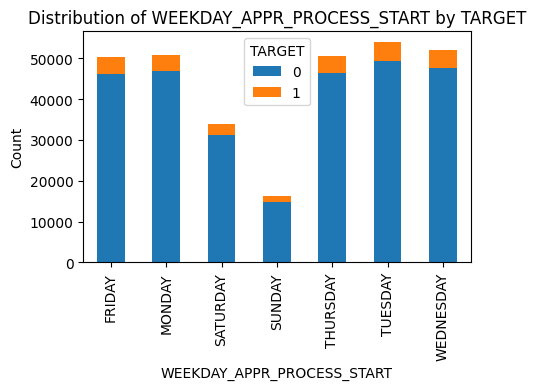

In [22]:
for x in cate_col[:11]:
    print('-'*20 + f'Distribution analysis for {x}' + '-'*20)
    distribution_cate(cate_plot_df, x)
    plot_categorical(cate_plot_df, x)

- **NAME_CONTRACT_TYPE:** Cash loans have a higher default rate than Revolving loans → consistent with economic intuition.

- **CODE_GENDER:** Males show a higher risk than females; the “XNA” category is extremely small, so replacing it with the mode is appropriate.

- **FLAG_OWN_CAR:** Clients who do not own a car have a higher default rate.

- **FLAG_OWN_REALTY:** Owning real estate reduces credit risk, although the difference is not large.  
  → Consider creating a combined asset flag: **FLAG_OWN_ASSETS = 1 if the client owns both a car and real estate**.

- **NAME_TYPE_SUITE:** Going with family members (Family, Children, Spouse/Partner) is associated with lower risk; going alone or with non-family members (Unaccompanied, Other_A/B, Group of people) increases risk.  
  → Can be grouped as: **1 = accompanied by family**, **0 = otherwise**.

- **NAME_INCOME_TYPE:** Some categories have extremely small sample sizes (Student, Businessman, Maternity leave, Unemployed) → group into **Other** to reduce noise.

- **NAME_EDUCATION_TYPE:** Lower education levels correspond to higher default rates → suitable for ordinal encoding (e.g., 1–5).

- **NAME_FAMILY_STATUS:** Married / Widow groups have lower risk, while Civil marriage / Single groups show higher risk.  
  → Create the feature **IS_SINGLE_OR_CIVIL = 1 for Single or Civil marriage**.

- **NAME_HOUSING_TYPE:** Rented and With parents show the highest default rates (>11%), while Office apartment has the lowest risk (~6.6%).  
  → Clients without independent housing tend to default more frequently.

- **OCCUPATION_TYPE:** Strong risk separation. High-skill and professional jobs (Accountants, Managers, IT, Medicine staff) show very low default rates (<7%), while low-skill labor jobs show significantly higher risk (especially Low-skill Laborers at 17%).  
  → Consider grouping occupations into Low / Medium / High risk categories or merging rare occupations into "Other".

- **WEEKDAY_APPR_PROCESS_START:** Default rates are very similar across all weekdays (7.7%–8.35%).  
  → Very weak predictive value, only represents when customer opens new loan => Drop this feature


--------------------Distribution analysis for ORGANIZATION_TYPE	--------------------
Default proportion for each category in: [3.12, 3.79, 4.48, 4.6, 4.86, 4.9, 5.0, 5.13, 5.19, 5.4, 5.54, 5.7, 5.88, 5.91, 6.12, 6.42, 6.42, 6.58, 6.6, 6.63, 6.68, 6.84, 6.98, 7.0, 7.03, 7.14, 7.14, 7.21, 7.63, 7.64, 7.8, 7.87, 7.94, 8.03, 8.14, 8.16, 8.44, 8.53, 8.65, 8.91, 9.15, 9.28, 9.3, 9.45, 9.98, 10.15, 10.17, 10.34, 10.47, 10.61, 10.62, 11.07, 11.15, 11.68, 11.71, 12.5, 13.43, 15.75]: 
Distribution for each category in: 
                               Count  Percent %
ORGANIZATION_TYPE      TARGET                  
Advertising            0         394      91.84
                       1          35       8.16
Agriculture            0        2197      89.53
                       1         257      10.47
Bank                   0        2377      94.81
                       1         130       5.19
Business Entity Type 1 0        5497      91.86
                       1         487       8.14
Busi

<Axes: xlabel='ORGANIZATION_TYPE'>

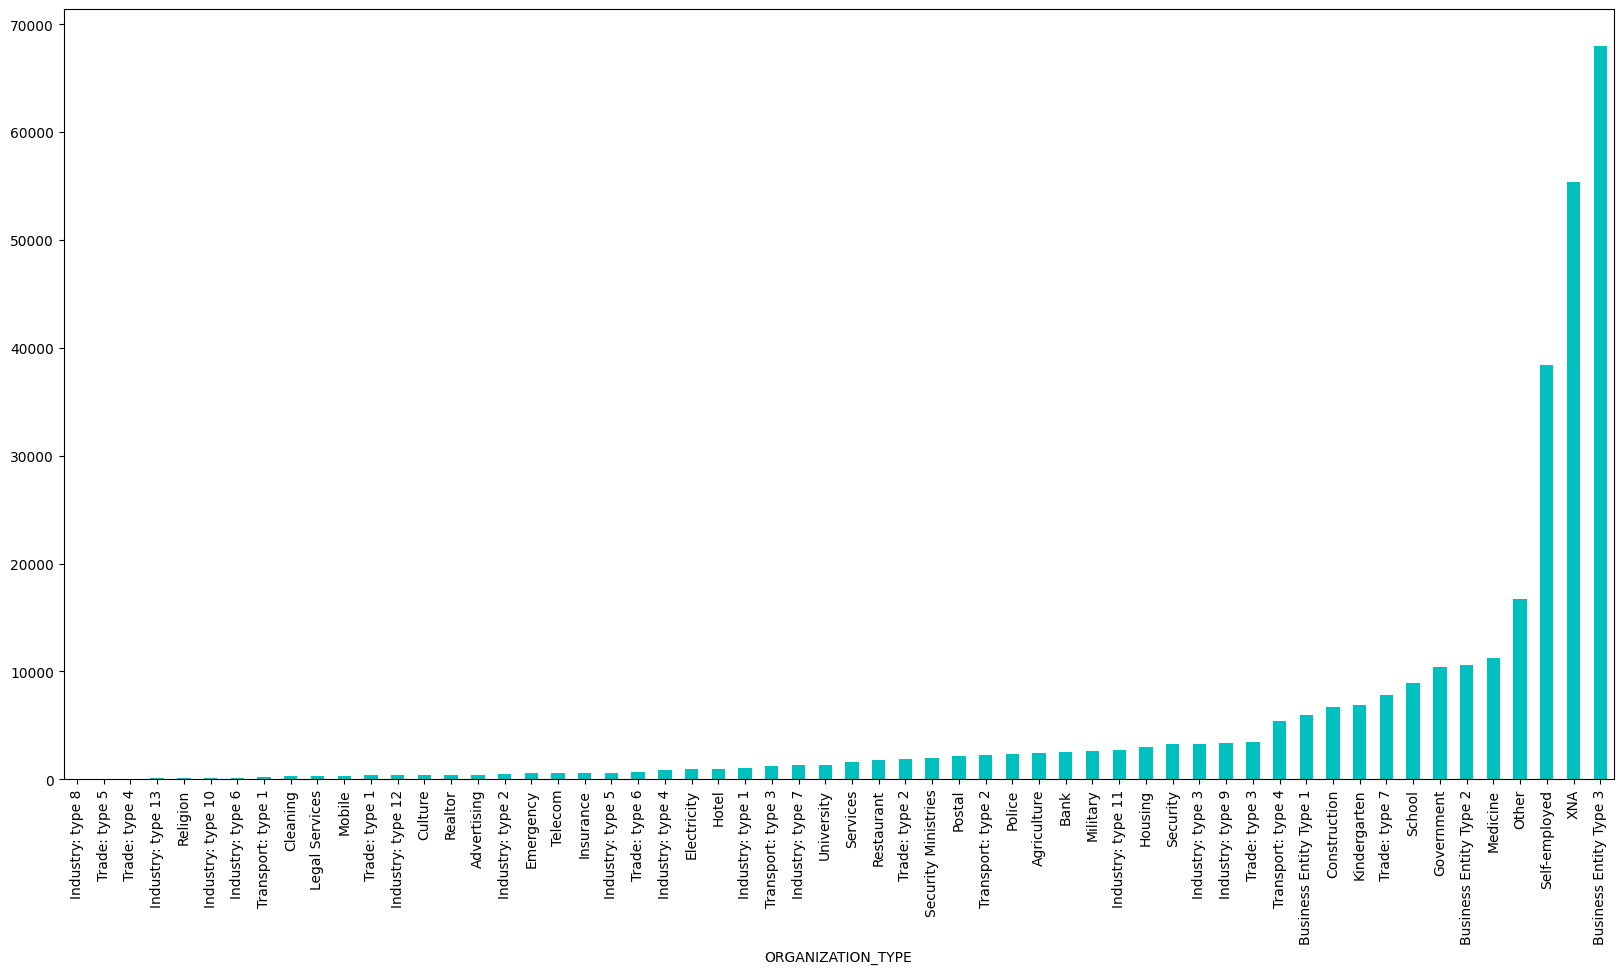

In [23]:
print('-'*20 + f'Distribution analysis for ORGANIZATION_TYPE	' + '-'*20)
calculate_pct(application_train, 'ORGANIZATION_TYPE')
distribution_cate(application_train, 'ORGANIZATION_TYPE')
application_train.ORGANIZATION_TYPE.value_counts().sort_values().plot(kind='bar', figsize=(20,10),color='c')

**Insights from ORGANIZATION_TYPE**

- **Stable public-sector occupations** (Police, Military, Government, School, University) show the **lowest default risk (<6%)**, indicating stable income and strong job security.

- **Manual labor and seasonal work groups** (Construction, Laborers, Cleaning, Restaurant, Transport) exhibit **high to very high default risk**, reflecting unstable income and higher vulnerability to economic cycles.

- **Self-employed workers** (~10.18% default rate) also fall into the **high-risk** group due to income volatility.

- Several “Trade type” and “Industry type” categories have **very small sample sizes**, so individual percentages should not be over-interpreted. These categories are better handled through grouping or ordinal risk scoring.

- **Handling XNA:**  
  The “XNA” category appears frequently and has a **low default rate (~5.4%)**.  
  → It is reasonable to **assign XNA to the low-risk group**, as its behavior aligns with other stable occupations.  
  You may also keep XNA as a distinct label during encoding if needed.

**=> Propose FE: Assign an ordinal risk level based on default proportions:**

- **1 = Low risk** (default rate < 6%)  
  Public sector, XNA, Bank, University, Police, etc.

- **2 = Medium risk** (6% – 9%)  
  Hotel, Housing, Insurance, Legal services, etc.

- **3 = High risk** (9% – 12%)  
  Construction, Laborers, Cleaning, Sales, Transport type 2, etc.

- **4 = Very high risk** (default > 12%)  
  Restaurant, Transport type 3, Industry type 13, Low-skill laborers, etc.

This encoding helps the model capture occupation-related financial stability and risk in a structured and interpretable way.


## 3.3 High N/A value variables

Next come to the 4 categorical columns containing the most missing values. We will only check the proportion of defaulters on these columns to decide whether it should be dropped or not.

In [25]:
for col in ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']:
    (distribution_cate(cate_plot_df, col))
    print('-'*50)

Distribution for each category in: 
                              Count  Percent %
FONDKAPREMONT_MODE    TARGET                  
not specified         0        5258      92.46
                      1         429       7.54
org spec account      0        5292      94.18
                      1         327       5.82
reg oper account      0       68678      93.02
                      1        5152       6.98
reg oper spec account 0       11288      93.44
                      1         792       6.56
--------------------------------------------------
Distribution for each category in: 
                          Count  Percent %
HOUSETYPE_MODE   TARGET                   
block of flats   0       140053      93.06
                 1        10450       6.94
specific housing 0         1347      89.86
                 1          152      10.14
terraced house   0         1109      91.50
                 1          103       8.50
--------------------------------------------------
Distribution

**High-Missing Building Metadata (FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE)**

- All four variables have >47% missing values, but each shows **clear differences in default risk** between categories.
- Missingness is **not random** and likely reflects real differences in housing data availability.
- → **Do not drop.**
- → Treat NA as its own category ('Unknown').
- → Optional: add missing-indicator flags to capture signal.
- These features can be particularly useful for tree-based models (LightGBM/XGBoost).


# 4. NUMERICAL VARIABLES

In [42]:
numerical_vars = application_train.select_dtypes(exclude='object').columns.to_list()
numerical_vars_df = pd.DataFrame(application_train[numerical_vars].nunique().sort_values())
numerical_vars_df

,0
TARGET,2
FLAG_MOBIL,2
FLAG_WORK_PHONE,2
FLAG_EMP_PHONE,2
REG_REGION_NOT_LIVE_REGION,2
FLAG_EMAIL,2
FLAG_PHONE,2
LIVE_CITY_NOT_WORK_CITY,2
REG_REGION_NOT_WORK_REGION,2
LIVE_REGION_NOT_WORK_REGION,2


In [43]:
numerical_vars_df['N/A percent %'] = round(application_train[numerical_vars].isnull().sum()/application_train.shape[0], 4) * 100
numerical_vars_df

,0,N/A percent %
TARGET,2,0.00
FLAG_MOBIL,2,0.00
FLAG_WORK_PHONE,2,0.00
FLAG_EMP_PHONE,2,0.00
REG_REGION_NOT_LIVE_REGION,2,0.00
FLAG_EMAIL,2,0.00
FLAG_PHONE,2,0.00
LIVE_CITY_NOT_WORK_CITY,2,0.00
REG_REGION_NOT_WORK_REGION,2,0.00
LIVE_REGION_NOT_WORK_REGION,2,0.00


Numerical variables naturally split into four groups:  
  1. **Binary flags/Dummy** (0/1) – highly informative, keep all.  
  2. **Ordinal-discrete variables** (3–30 unique values) – keep as-is, may combine or cap extremes.  
  3. **Building-related continuous variables** – many missing values but contain meaningful patterns; impute carefully and consider creating binary “Has/No” indicators.  
  4. **Core economic variables** (credit, income, annuity, days, EXT_SOURCE_*): the strongest predictors → create ratio-based engineered features.


In [50]:
# save dummy variable to list
dummy = numerical_vars_df[numerical_vars_df[0] == 2].index.to_list()
print(dummy)

['TARGET', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_EMAIL', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18']


In [52]:
num_df = pd.DataFrame(application_train[numerical_vars])
num_df.drop(columns=dummy)
num_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
def draw_boxplot_with_outliers(df, cols_per_row=2):
    """
    Draw simple boxplots for all numerical columns.
    Highlights outliers based on percentile thresholds (5th & 95th).
    """

    num_cols = len(df.columns)
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row
    
    plt.figure(figsize=(14, 5 * num_rows))

    for i, col in enumerate(df.columns, start=1):

        # create subplot
        plt.subplot(num_rows, cols_per_row, i)

        # calculate percentile 5 & 95
        lower = np.percentile(df[col].dropna(), 5)
        upper = np.percentile(df[col].dropna(), 95)

        # Vẽ boxplot (whis=[5,95] sẽ làm whiskers dựa trên percentiles)
        sns.boxplot(y=df[col], whis=[5, 95], color="lightblue")

        # Highlight outliers
        outliers = df[(df[col] < lower) or (df[col] > upper)][col]
        plt.scatter([0] * len(outliers), outliers, color='red', s=12, label='Outliers')

        plt.title(f"{col} (P5–P95 outliers)", fontsize=11)
        plt.legend()

    plt.tight_layout()
    plt.show()

In [59]:
num_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

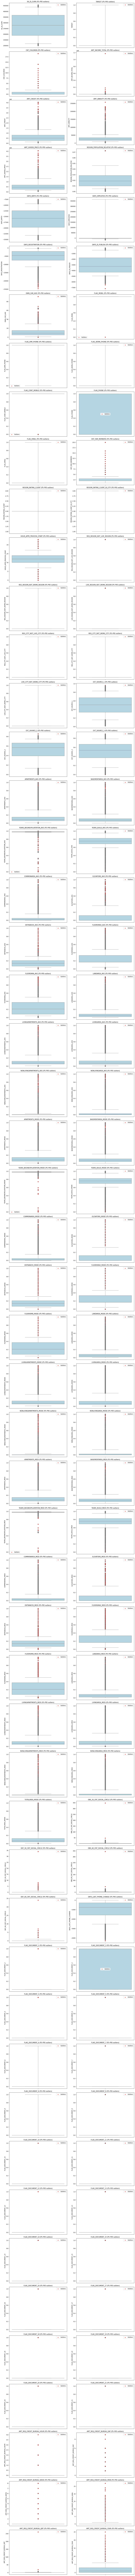

In [58]:
draw_boxplot_with_outliers(num_df)

Numerical Variables – Short Summary

**1. Identification & Target**
- **SK_ID_CURR** → ID only
- **TARGET** → Imbalanced (8%), apply class-weight / resampling.

**2. Demographics**
- **CNT_CHILDREN**, **CNT_FAM_MEMBERS** → Right-skewed, extreme values → cap winsorize.
- **DAYS_BIRTH** → Clean; convert to AGE.
- **OWN_CAR_AGE** → 66% missing; create HAS_CAR + impute.

**3. Financial Variables**
- **AMT_INCOME_TOTAL**, **AMT_CREDIT**, **AMT_GOODS_PRICE** → Heavy outliers → log-transform.
- **AMT_ANNUITY** → Mild skew; useful for ratio features.

**4. Time-Related**
- **DAYS_EMPLOYED** → 365243 = missing flag → create anomaly feature + impute.
- **DAYS_REGISTRATION**, **DAYS_ID_PUBLISH** → Acceptable long tails.
- **DAYS_LAST_PHONE_CHANGE** → Clean.

**5. Binary Flags**
- **FLAG_MOBIL**, some **FLAG_DOCUMENT_xx** → Very low variance → drop.
- Keep only flags with meaningful variance.

**6. External Scores**
- **EXT_SOURCE_1 (56% NA)**, **EXT_SOURCE_3 (20% NA)** → Impute + create missing indicators.
- Strong predictors; keep all 3.

**7. Housing / Property Features**
- Many *_MODE and *_MEDI have 50–70% NA + redundancy.
- Keep only a small subset (e.g., *_AVG) and drop most *_MODE/*_MEDI.

**8. Social Circle Variables**
- OBS_30/60, DEF_30/60 → Clean integers; keep.

**9. Credit Bureau Requests**
- ~13% NA, highly skewed with many zeros → consider scaling or binning.

**Overall**
- Apply log transforms for monetary variables.
- Remove low-variance flags.
- Handle NA patterns carefully, especially EXT_SOURCE and housing variables.

## 4.1 Demographic variables (Age, Family, Own car age, ...)

In [84]:
def plot_density(df, columns):
    """Plots the density of columns in a DataFrame.

    Args:
        df: The input DataFrame.
    """

    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df.loc[df['TARGET'] == 0, col], label='0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, col], label='1')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'Distribution of {col} by TARGET')
        plt.legend()
        plt.show()

def corr_matrix(df, col:list):
    plot_df = df[col]
    mask = np.zeros_like(plot_df.corr(numeric_only=True), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[np.diag_indices_from(mask)] = False
    plt.figure(figsize=(10,7))
    sns.heatmap(plot_df.corr(), annot=True, mask= mask, cmap= "summer")


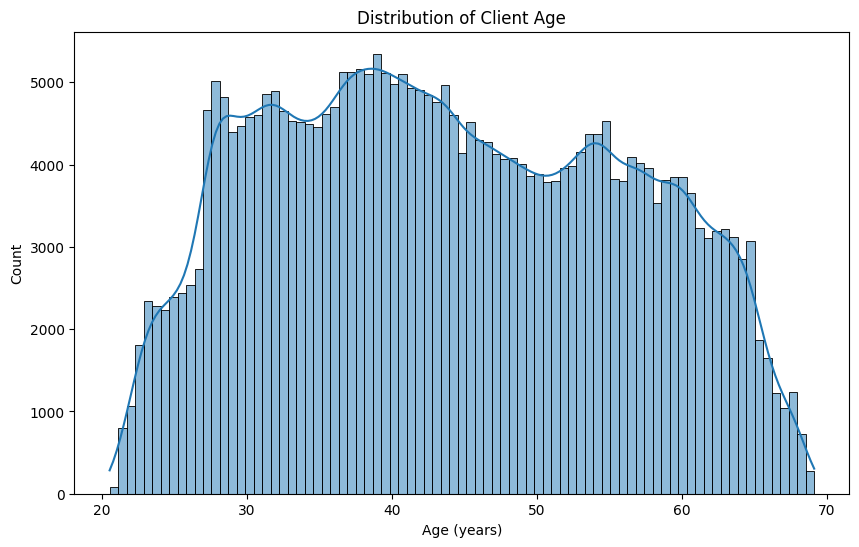

In [85]:
#plot the distribution of age of clients
plt.figure(figsize=(10, 6))
sns.histplot(application_train['DAYS_BIRTH'] / -365, kde=True)
plt.title('Distribution of Client Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

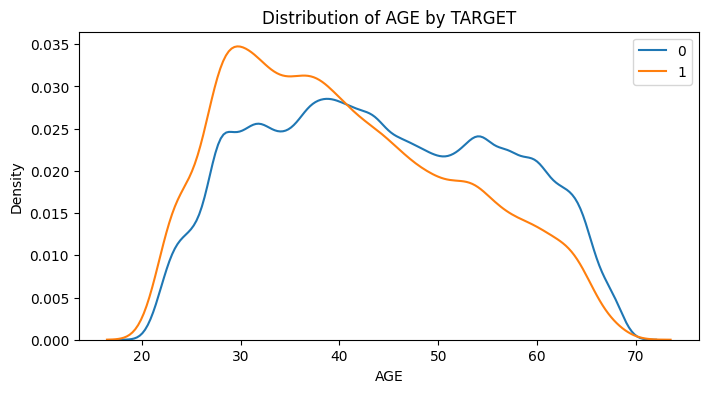

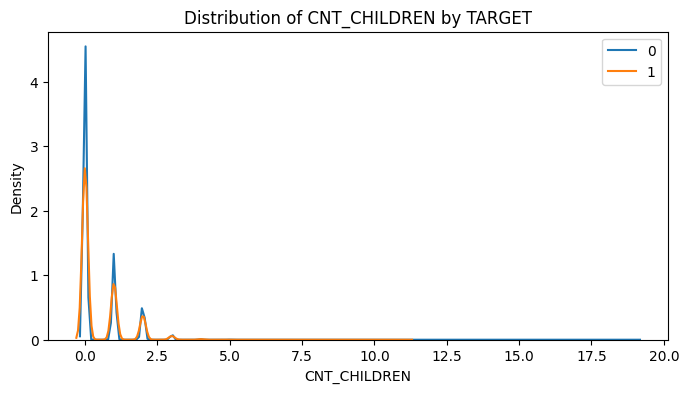

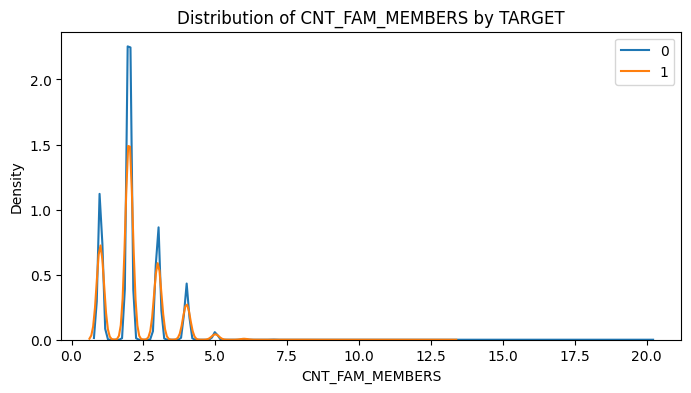

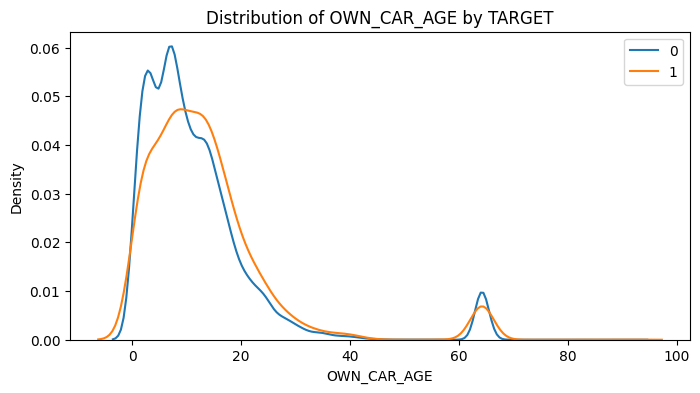

In [86]:
# Plot age density
application_train['AGE'] = application_train['DAYS_BIRTH'] / -365
plot_density(application_train, ['AGE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'OWN_CAR_AGE'])

**AGE**
- Younger clients (< 35) show a noticeably higher default rate.  
- Older applicants (> 50) have significantly lower risk.  
- **Feature ideas:**  
  - `AGE_BIN` (≤30, 30–40, 40–50, >50)  
  - `YOUNG_FLAG = 1 if AGE < 35`

 **CNT_CHILDREN**
- Strongly right-skewed; most applicants have **0–1 child**.  
- Default risk increases slightly with **1–2 children**.  
- Extreme values (≥10) should be capped.  
- **Feature ideas:**  
  - `CHILDREN_BIN` (0, 1, 2, ≥3)  
  - `HAS_CHILD = 1 if CNT_CHILDREN ≥ 1`


 **CNT_FAM_MEMBERS**
- Most households consist of **2–4 members**.  
- Larger families show slightly higher risk.  
- Predictive power expected to be weak.  
- **Feature ideas:**  
  - `BIG_FAMILY_FLAG = 1 if CNT_FAM_MEMBERS ≥ 4`

**OWN_CAR_AGE**
- Right-skewed distribution; most cars are **0–20 years old**.  
- Defaulted clients tend to have **newer cars**, suggesting higher financial commitments.  
- **Feature ideas:**  
  - `HAS_CAR = 1 if OWN_CAR_AGE > 0`  
  - `CAR_AGE_BIN` (0–5, 5–15, >15 years)


## 4.2 Financial variables (Amt income, credit, ...)

In [87]:
financial_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

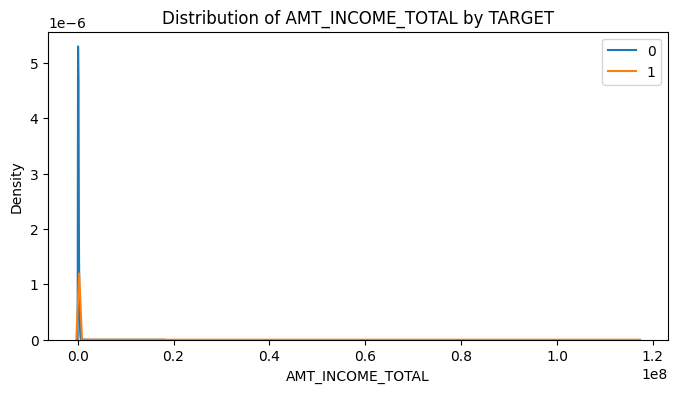

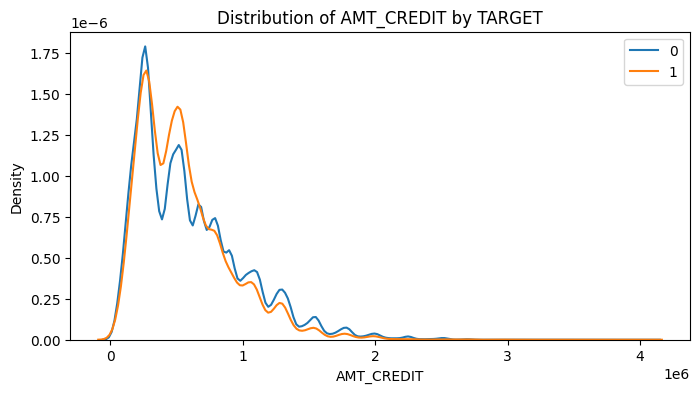

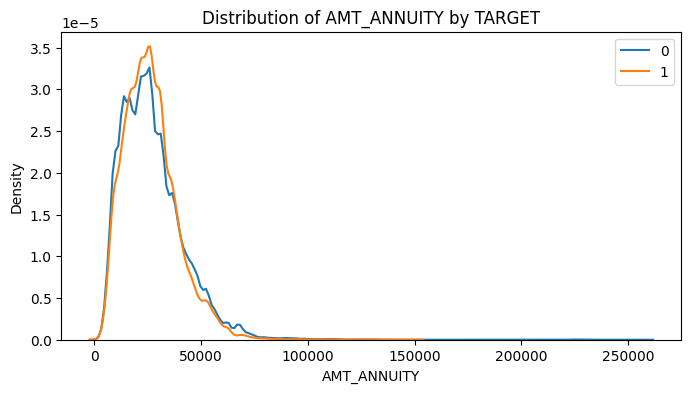

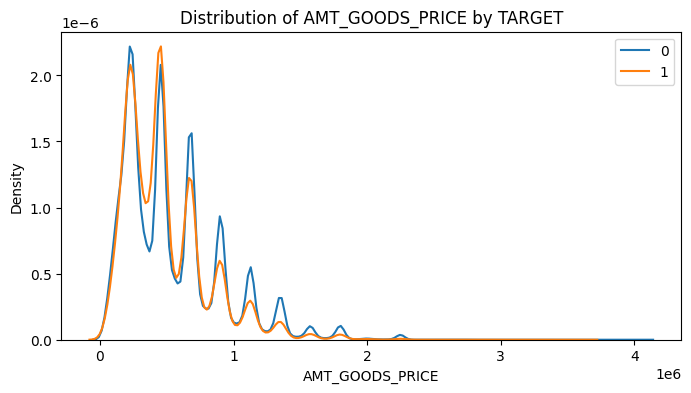

In [88]:
plot_density(application_train, financial_vars)

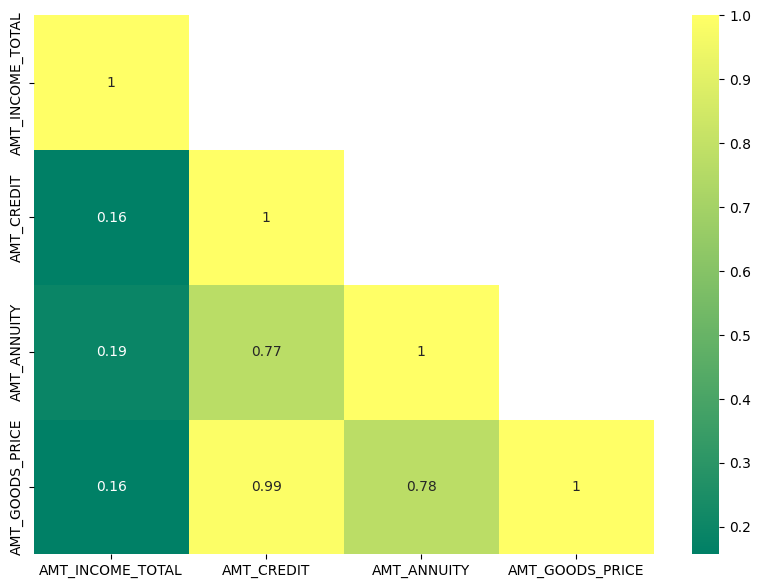

In [89]:
corr_matrix(application_train, financial_vars)

**1. AMT_INCOME_TOTAL (Client Income)**
- Extremely right-skewed distribution with several extreme outliers → very unequal income distribution.
- Defaulters and non-defaulters have almost identical density curves → **income alone is not a strong predictor of default**.
- Lower-income applicants appear slightly more concentrated among defaulters, but the difference is small.
- **Recommendation:** Apply log-transform and create ratios such as `CREDIT/INCOME` or `ANNUITY/INCOME`, which often carry more predictive power than raw income.

**2. AMT_CREDIT (Total Credit Amount)**
- Right-skewed distribution; most clients borrow relatively small amounts, with a long tail toward large loans.
- Defaulters slightly concentrate at *lower loan sizes*, indicating smaller-ticket borrowers may be riskier.
- Strongly correlated with AMT_GOODS_PRICE (≈0.99) → they essentially measure the same thing.
- **Insight:** This is a core variable, but raw values are not highly discriminative. Ratios (e.g., credit/income) are more meaningful.

 **3. AMT_ANNUITY (Loan Monthly/Yearly Payment)**
- Skewed distribution similar to credit; higher annuity amounts appear in non-default clients.
- Defaulters tend to have **slightly lower annuity obligations**, hinting that they often borrow smaller amounts.
- High correlation with both credit (0.77) and goods_price (≈0.78) → indicates structural redundancy.
- **Insight:** Useful after normalization, especially as `ANNUITY/INCOME` or `ANNUITY/CREDIT`.

**4. AMT_GOODS_PRICE (Purchase Value of Goods)**
- Distribution almost identical to AMT_CREDIT due to near-perfect correlation.
- Defaulters lean toward lower goods prices, consistent with lower credit amounts.
- Adds **minimal unique information** beyond AMT_CREDIT.
- **Recommendation:** Keep only one of the two (prefer AMT_CREDIT), unless modeling requires both.

**5. Correlation & Multicollinearity Pattern**
- **AMT_CREDIT ↔ AMT_GOODS_PRICE = 0.99**  
  → Redundant; both reflect purchase/loan size.
- **AMT_CREDIT ↔ AMT_ANNUITY ≈ 0.77**  
  → Payment size directly tied to loan amount.
- **AMT_INCOME_TOTAL shows low correlation (< 0.20)** with all others  
  → Indicates income is independent and could interact well through engineered features.

**Insight:**  
These financial variables individually show **heavy overlap** between defaulters and non-defaulters.  
They are **not strong one-dimensional predictors**, but become powerful when combined into **ratios and derived features**.

**Overall summary**
- Raw financial values **do not differentiate defaulters strongly**; distributions overlap heavily.
- There is a mild trend where defaulters generally have **lower income, lower credit amounts, and smaller annuity payments**.
- High multicollinearity: **CREDIT, GOODS_PRICE, and ANNUITY** capture nearly the same information.
- Best predictive performance will likely come from **feature engineering**, such as:
  - `CREDIT / INCOME`
  - `ANNUITY / INCOME`
  - `ANNUITY / CREDIT`
  - `GOODS_PRICE / INCOME`

These ratios capture **ability to repay**, which is more meaningful for credit risk prediction than raw financial amounts.

